In [1]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             import torch
import torchvision
from project1_model import project1_model
from torchsummary import summary
from torchtoolbox.transform import CIFAR10Policy, Cutout
from torchvision.transforms import Compose, RandomCrop, RandomHorizontalFlip, ToTensor, Normalize
import matplotlib.pyplot as plt

In [2]:
Epoch = 160
Batch_size = 128
Loss = torch.nn.CrossEntropyLoss()

In [3]:
transform_train_1 = Compose(
        [ToTensor(), Normalize(mean=[0.491, 0.482, 0.446], std=[0.247, 0.243, 0.261])])
transform_test_1 = Compose(
        [ToTensor(), Normalize(mean=[0.491, 0.482, 0.446], std=[0.247, 0.243, 0.261])])


trainingdata_1 = torchvision.datasets.CIFAR10('./CIFAR10/', train=True, download=True, transform=transform_train_1)
testdata_1 = torchvision.datasets.CIFAR10('./CIFAR10/', train=False, download=True, transform=transform_test_1)


trainDataLoader_1 = torch.utils.data.DataLoader(trainingdata_1, Batch_size, shuffle=True)
testDataLoader_1 = torch.utils.data.DataLoader(testdata_1, Batch_size, shuffle=False)

model_1 = project1_model().cuda()
optimizer_1 = torch.optim.Adam(model_1.parameters(), lr=3e-4)
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

train_loss_history_1 = []
test_loss_history_1 = []
test_acc_history_1 = []

start.record()

for epoch in range(Epoch):
    train_loss = 0.0
    test_loss = 0.0
    test_acc = 0.0

    train_total = 0.0
    test_total = 0.0

    for i, data in enumerate(trainDataLoader_1):
        x, labels = data
        x = x.cuda()
        train_total+=labels.size(0)
        labels = labels.cuda()
        optimizer_1.zero_grad()
        predicted_output = model_1(x)
        fit = Loss(predicted_output, labels)
        fit.backward()
        optimizer_1.step()
        train_loss += fit.item()

    for i, data in enumerate(testDataLoader_1):
        with torch.no_grad():
            x, labels = data
            test_total += labels.size(0)
            x = x.cuda()
            labels = labels.cuda()
            predicted_output = model_1(x)
            fit = Loss(predicted_output, labels)
            test_loss += fit.item()
            test_acc += (torch.eq(torch.max(predicted_output, 1)[1], labels).sum()).data.cpu().numpy()

    train_loss = train_loss / len(trainDataLoader_1)
    test_loss = test_loss / len(testDataLoader_1)
    test_acc = test_acc / test_total

    train_loss_history_1.append(train_loss)
    test_loss_history_1.append(test_loss)
    test_acc_history_1.append(test_acc)

    print('Epoch %s, Train loss %s, Test loss %s, Test acc %s' % (epoch, train_loss, test_loss, test_acc))

end.record()
torch.cuda.synchronize()
print(start.elapsed_time(end))

Files already downloaded and verified
Files already downloaded and verified
Epoch 0, Train loss 1.3709689916857064, Test loss 1.0714380726029602, Test acc 0.6114
Epoch 1, Train loss 0.8757673447089427, Test loss 0.8067238723175435, Test acc 0.7156
Epoch 2, Train loss 0.6570950254150059, Test loss 0.6891266013248057, Test acc 0.764
Epoch 3, Train loss 0.5155888611398389, Test loss 0.6143260315249238, Test acc 0.7828
Epoch 4, Train loss 0.42040451381669935, Test loss 0.5982350333581997, Test acc 0.8064
Epoch 5, Train loss 0.33439877812209945, Test loss 0.6200895954536486, Test acc 0.7956
Epoch 6, Train loss 0.25734131956649253, Test loss 0.6254001069295255, Test acc 0.8035
Epoch 7, Train loss 0.2063880410150189, Test loss 0.6210714688029471, Test acc 0.8101
Epoch 8, Train loss 0.154118059360234, Test loss 0.6694034089016009, Test acc 0.8109
Epoch 9, Train loss 0.1305681726206904, Test loss 0.7285272701631619, Test acc 0.8109
Epoch 10, Train loss 0.10792507960573029, Test loss 0.698848520

Epoch 93, Train loss 0.004646234424303785, Test loss 1.1905694102184683, Test acc 0.8295
Epoch 94, Train loss 0.01999865101881178, Test loss 1.128384394358985, Test acc 0.8223
Epoch 95, Train loss 0.01030081403090397, Test loss 1.058068482936183, Test acc 0.8336
Epoch 96, Train loss 0.002611180844475114, Test loss 1.0777052735226065, Test acc 0.8394
Epoch 97, Train loss 0.0018010083536664798, Test loss 1.10095904333682, Test acc 0.8377
Epoch 98, Train loss 0.004732823104347826, Test loss 1.2158073466035384, Test acc 0.825
Epoch 99, Train loss 0.019524952243899513, Test loss 1.087646385536918, Test acc 0.8299
Epoch 100, Train loss 0.009641131750591423, Test loss 1.0890864910958689, Test acc 0.834
Epoch 101, Train loss 0.00545259732509452, Test loss 1.0856214558021933, Test acc 0.8291
Epoch 102, Train loss 0.0067942240494000454, Test loss 1.1160324619540685, Test acc 0.8317
Epoch 103, Train loss 0.005911082865445085, Test loss 1.1483781650851044, Test acc 0.8301
Epoch 104, Train loss 0.0

In [4]:
transform_train_2 = Compose(
        [ToTensor(), Normalize(mean=[0.491, 0.482, 0.446], std=[0.247, 0.243, 0.261])])
transform_test_2 = Compose(
        [ToTensor(), Normalize(mean=[0.491, 0.482, 0.446], std=[0.247, 0.243, 0.261])])


trainingdata_2 = torchvision.datasets.CIFAR10('./CIFAR10/', train=True, download=True, transform=transform_train_2)
testdata_2 = torchvision.datasets.CIFAR10('./CIFAR10/', train=False, download=True, transform=transform_test_2)


trainDataLoader_2 = torch.utils.data.DataLoader(trainingdata_2, Batch_size, shuffle=True)
testDataLoader_2 = torch.utils.data.DataLoader(testdata_2, Batch_size, shuffle=False)

model_2 = project1_model().cuda()
optimizer_2 = torch.optim.Adam(model_2.parameters(), lr=3e-4, weight_decay=5e-4)
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

train_loss_history_2 = []
test_loss_history_2 = []
test_acc_history_2 = []

start.record()

for epoch in range(Epoch):
    train_loss = 0.0
    test_loss = 0.0
    test_acc = 0.0

    train_total = 0.0
    test_total = 0.0

    for i, data in enumerate(trainDataLoader_2):
        x, labels = data
        x = x.cuda()
        train_total+=labels.size(0)
        labels = labels.cuda()
        optimizer_2.zero_grad()
        predicted_output = model_2(x)
        fit = Loss(predicted_output, labels)
        fit.backward()
        optimizer_2.step()
        train_loss += fit.item()

    for i, data in enumerate(testDataLoader_2):
        with torch.no_grad():
            x, labels = data
            test_total += labels.size(0)
            x = x.cuda()
            labels = labels.cuda()
            predicted_output = model_2(x)
            fit = Loss(predicted_output, labels)
            test_loss += fit.item()
            test_acc += (torch.eq(torch.max(predicted_output, 1)[1], labels).sum()).data.cpu().numpy()

    train_loss = train_loss / len(trainDataLoader_2)
    test_loss = test_loss / len(testDataLoader_2)
    test_acc = test_acc / test_total

    train_loss_history_2.append(train_loss)
    test_loss_history_2.append(test_loss)
    test_acc_history_2.append(test_acc)

    print('Epoch %s, Train loss %s, Test loss %s, Test acc %s' % (epoch, train_loss, test_loss, test_acc))

end.record()
torch.cuda.synchronize()
print(start.elapsed_time(end))

Files already downloaded and verified
Files already downloaded and verified
Epoch 0, Train loss 1.35487651413359, Test loss 1.0429528695118577, Test acc 0.6257
Epoch 1, Train loss 0.8895320989896575, Test loss 0.7969633054129684, Test acc 0.7226
Epoch 2, Train loss 0.6690596597426383, Test loss 0.7089751687230943, Test acc 0.7552
Epoch 3, Train loss 0.5453308188854276, Test loss 0.6484634710263603, Test acc 0.7817
Epoch 4, Train loss 0.4510472601332018, Test loss 0.625245525112635, Test acc 0.7941
Epoch 5, Train loss 0.37328018305246785, Test loss 0.6025624380836004, Test acc 0.7956
Epoch 6, Train loss 0.31896979862924124, Test loss 0.6053565914117838, Test acc 0.8041
Epoch 7, Train loss 0.2687617342757142, Test loss 0.5948422460616389, Test acc 0.8088
Epoch 8, Train loss 0.2228818677384835, Test loss 0.6266587244558938, Test acc 0.8115
Epoch 9, Train loss 0.19248224620509635, Test loss 0.6365191257452663, Test acc 0.8062
Epoch 10, Train loss 0.1570149845422229, Test loss 0.68348926456

Epoch 93, Train loss 0.03800200064883322, Test loss 0.7704982750023468, Test acc 0.8261
Epoch 94, Train loss 0.033752037206297866, Test loss 0.7719683609431303, Test acc 0.8217
Epoch 95, Train loss 0.03280264448703212, Test loss 0.7800065354455875, Test acc 0.8234
Epoch 96, Train loss 0.03907272505604893, Test loss 0.790994494398938, Test acc 0.8222
Epoch 97, Train loss 0.036695428865502026, Test loss 0.775013904028301, Test acc 0.8283
Epoch 98, Train loss 0.027097288256539676, Test loss 0.7759747116626063, Test acc 0.8292
Epoch 99, Train loss 0.035969357673779054, Test loss 0.7963080575949029, Test acc 0.8237
Epoch 100, Train loss 0.033682051350546006, Test loss 0.7799032847338085, Test acc 0.8246
Epoch 101, Train loss 0.03337153272174508, Test loss 0.7602249976200394, Test acc 0.828
Epoch 102, Train loss 0.03475710581106794, Test loss 0.7680764088902292, Test acc 0.8322
Epoch 103, Train loss 0.030502259454992423, Test loss 0.7504707846460463, Test acc 0.8286
Epoch 104, Train loss 0.0

In [5]:
transform_train_3 = Compose(
        [RandomCrop(32, padding=4), RandomHorizontalFlip(),
         ToTensor(), Normalize(mean=[0.491, 0.482, 0.446], std=[0.247, 0.243, 0.261])])
transform_test_3 = Compose(
        [ToTensor(), Normalize(mean=[0.491, 0.482, 0.446], std=[0.247, 0.243, 0.261])])


trainingdata_3 = torchvision.datasets.CIFAR10('./CIFAR10/', train=True, download=True, transform=transform_train_3)
testdata_3 = torchvision.datasets.CIFAR10('./CIFAR10/', train=False, download=True, transform=transform_test_3)


trainDataLoader_3 = torch.utils.data.DataLoader(trainingdata_3, Batch_size, shuffle=True)
testDataLoader_3 = torch.utils.data.DataLoader(testdata_3, Batch_size, shuffle=False)

model_3 = project1_model().cuda()
optimizer_3 = torch.optim.Adam(model_3.parameters(), lr=3e-4, weight_decay=5e-4)

start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

train_loss_history_3 = []
test_loss_history_3 = []
test_acc_history_3 = []

start.record()

for epoch in range(Epoch):
    train_loss = 0.0
    test_loss = 0.0
    test_acc = 0.0

    train_total = 0.0
    test_total = 0.0

    for i, data in enumerate(trainDataLoader_3):
        x, labels = data
        x = x.cuda()
        train_total+=labels.size(0)
        labels = labels.cuda()
        optimizer_3.zero_grad()
        predicted_output = model_3(x)
        fit = Loss(predicted_output, labels)
        fit.backward()
        optimizer_3.step()
        train_loss += fit.item()

    for i, data in enumerate(testDataLoader_3):
        with torch.no_grad():
            x, labels = data
            test_total += labels.size(0)
            x = x.cuda()
            labels = labels.cuda()
            predicted_output = model_3(x)
            fit = Loss(predicted_output, labels)
            test_loss += fit.item()
            test_acc += (torch.eq(torch.max(predicted_output, 1)[1], labels).sum()).data.cpu().numpy()

    train_loss = train_loss / len(trainDataLoader_3)
    test_loss = test_loss / len(testDataLoader_3)
    test_acc = test_acc / test_total

    train_loss_history_3.append(train_loss)
    test_loss_history_3.append(test_loss)
    test_acc_history_3.append(test_acc)

    print('Epoch %s, Train loss %s, Test loss %s, Test acc %s' % (epoch, train_loss, test_loss, test_acc))

end.record()
torch.cuda.synchronize()
print(start.elapsed_time(end))

Files already downloaded and verified
Files already downloaded and verified
Epoch 0, Train loss 1.5296860765618132, Test loss 1.2460416600674014, Test acc 0.5539
Epoch 1, Train loss 1.0689185975152817, Test loss 0.9472009184994276, Test acc 0.6621
Epoch 2, Train loss 0.842747044227922, Test loss 0.7754815582987629, Test acc 0.727
Epoch 3, Train loss 0.7126318542548763, Test loss 0.7238587095767637, Test acc 0.7502
Epoch 4, Train loss 0.6329922442088651, Test loss 0.6536213865008536, Test acc 0.7802
Epoch 5, Train loss 0.5746717856210821, Test loss 0.6313334982606429, Test acc 0.7843
Epoch 6, Train loss 0.5222431011974354, Test loss 0.5711654137961472, Test acc 0.8071
Epoch 7, Train loss 0.4877579849394386, Test loss 0.5411544770379609, Test acc 0.8198
Epoch 8, Train loss 0.45704682956418724, Test loss 0.510597606625738, Test acc 0.8255
Epoch 9, Train loss 0.4273252527579627, Test loss 0.49977193867103964, Test acc 0.8296
Epoch 10, Train loss 0.4027308046131793, Test loss 0.493022273990

Epoch 93, Train loss 0.08780293247145612, Test loss 0.3596767487027977, Test acc 0.897
Epoch 94, Train loss 0.08942893632899618, Test loss 0.3621072609779201, Test acc 0.9016
Epoch 95, Train loss 0.0882148331369433, Test loss 0.37290727658362327, Test acc 0.894
Epoch 96, Train loss 0.08722287462190594, Test loss 0.3546585033211527, Test acc 0.9006
Epoch 97, Train loss 0.0897458477298279, Test loss 0.36809169378461715, Test acc 0.8976
Epoch 98, Train loss 0.08952688593703234, Test loss 0.3657577113260197, Test acc 0.8977
Epoch 99, Train loss 0.09324583260680708, Test loss 0.36017955405802665, Test acc 0.8969
Epoch 100, Train loss 0.08432012052773058, Test loss 0.3720385849098616, Test acc 0.8965
Epoch 101, Train loss 0.08460245326713985, Test loss 0.3449678624732585, Test acc 0.9026
Epoch 102, Train loss 0.08997570143540955, Test loss 0.36349597007413453, Test acc 0.8973
Epoch 103, Train loss 0.0887637748823637, Test loss 0.34235035477182535, Test acc 0.9006
Epoch 104, Train loss 0.0838

In [6]:
transform_train_4 = Compose(
        [RandomCrop(32, padding=4), RandomHorizontalFlip(), CIFAR10Policy,
         ToTensor(), Normalize(mean=[0.491, 0.482, 0.446], std=[0.247, 0.243, 0.261])])
transform_test_4 = Compose(
        [ToTensor(), Normalize(mean=[0.491, 0.482, 0.446], std=[0.247, 0.243, 0.261])])


trainingdata_4 = torchvision.datasets.CIFAR10('./CIFAR10/', train=True, download=True, transform=transform_train_4)
testdata_4 = torchvision.datasets.CIFAR10('./CIFAR10/', train=False, download=True, transform=transform_test_4)


trainDataLoader_4 = torch.utils.data.DataLoader(trainingdata_4, Batch_size, shuffle=True)
testDataLoader_4 = torch.utils.data.DataLoader(testdata_4, Batch_size, shuffle=False)

model_4 = project1_model().cuda()
optimizer_4 = torch.optim.Adam(model_4.parameters(), lr=3e-4, weight_decay=5e-4)

start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

train_loss_history_4 = []
test_loss_history_4 = []
test_acc_history_4 = []

start.record()

for epoch in range(Epoch):
    train_loss = 0.0
    test_loss = 0.0
    test_acc = 0.0

    train_total = 0.0
    test_total = 0.0

    for i, data in enumerate(trainDataLoader_4):
        x, labels = data
        x = x.cuda()
        train_total+=labels.size(0)
        labels = labels.cuda()
        optimizer_4.zero_grad()
        predicted_output = model_4(x)
        fit = Loss(predicted_output, labels)
        fit.backward()
        optimizer_4.step()
        train_loss += fit.item()

    for i, data in enumerate(testDataLoader_4):
        with torch.no_grad():
            x, labels = data
            test_total += labels.size(0)
            x = x.cuda()
            labels = labels.cuda()
            predicted_output = model_4(x)
            fit = Loss(predicted_output, labels)
            test_loss += fit.item()
            test_acc += (torch.eq(torch.max(predicted_output, 1)[1], labels).sum()).data.cpu().numpy()

    train_loss = train_loss / len(trainDataLoader_4)
    test_loss = test_loss / len(testDataLoader_4)
    test_acc = test_acc / test_total

    train_loss_history_4.append(train_loss)
    test_loss_history_4.append(test_loss)
    test_acc_history_4.append(test_acc)

    print('Epoch %s, Train loss %s, Test loss %s, Test acc %s' % (epoch, train_loss, test_loss, test_acc))

end.record()
torch.cuda.synchronize()
print(start.elapsed_time(end))

Files already downloaded and verified
Files already downloaded and verified
Epoch 0, Train loss 1.8461415981087843, Test loss 1.4194394591488415, Test acc 0.4833
Epoch 1, Train loss 1.392379632081522, Test loss 1.0758447284939923, Test acc 0.6213
Epoch 2, Train loss 1.1422992979778963, Test loss 0.895899889589865, Test acc 0.6833
Epoch 3, Train loss 0.9901021911055231, Test loss 0.7818500437313998, Test acc 0.734
Epoch 4, Train loss 0.8889163752346088, Test loss 0.6877109276342995, Test acc 0.7645
Epoch 5, Train loss 0.8226027069494243, Test loss 0.6380433594878716, Test acc 0.7824
Epoch 6, Train loss 0.7683446649700174, Test loss 0.590198786575583, Test acc 0.8012
Epoch 7, Train loss 0.7217733488820702, Test loss 0.5827867083157166, Test acc 0.8015
Epoch 8, Train loss 0.6887003672702233, Test loss 0.5280344282524495, Test acc 0.8225
Epoch 9, Train loss 0.6541357106717346, Test loss 0.5321297656886185, Test acc 0.8199
Epoch 10, Train loss 0.6337444030720255, Test loss 0.498030342633211

Epoch 93, Train loss 0.26867930958871644, Test loss 0.27583308244430566, Test acc 0.9111
Epoch 94, Train loss 0.26687059690580345, Test loss 0.2868224677594402, Test acc 0.9081
Epoch 95, Train loss 0.25933187664546015, Test loss 0.2715493389700033, Test acc 0.9115
Epoch 96, Train loss 0.2615755373026099, Test loss 0.2758736106791074, Test acc 0.9092
Epoch 97, Train loss 0.2601079474705869, Test loss 0.2691044422644603, Test acc 0.915
Epoch 98, Train loss 0.2594195037051235, Test loss 0.274286777346949, Test acc 0.9079
Epoch 99, Train loss 0.25653696523221864, Test loss 0.26449073737935175, Test acc 0.9132
Epoch 100, Train loss 0.2626345200688028, Test loss 0.2891921829196471, Test acc 0.9055
Epoch 101, Train loss 0.26307541878936846, Test loss 0.2712592471249496, Test acc 0.9131
Epoch 102, Train loss 0.25485431662072305, Test loss 0.2928783862462527, Test acc 0.9056
Epoch 103, Train loss 0.25309198214422407, Test loss 0.2672810139535349, Test acc 0.9123
Epoch 104, Train loss 0.25899553

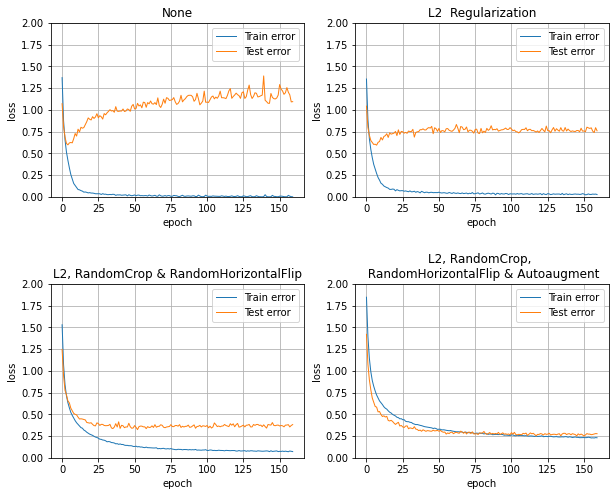

In [26]:
plt.subplots(figsize=(10,8))
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.subplot(2,2,1)
plt.plot(range(Epoch), train_loss_history_1, '-', linewidth=1, label='Train error')
plt.plot(range(Epoch), test_loss_history_1, '-', linewidth=1, label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('None')
plt.ylim((0,2))
plt.grid(True)
plt.legend()
plt.subplot(2,2,2)
plt.plot(range(Epoch), train_loss_history_2, '-', linewidth=1, label='Train error')
plt.plot(range(Epoch), test_loss_history_2, '-', linewidth=1, label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('L2  Regularization')
plt.ylim((0,2))
plt.grid(True)
plt.legend()
plt.subplot(2,2,3)
plt.plot(range(Epoch), train_loss_history_3, '-', linewidth=1, label='Train error')
plt.plot(range(Epoch), test_loss_history_3, '-', linewidth=1, label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('L2, RandomCrop & RandomHorizontalFlip')
plt.ylim((0,2))
plt.grid(True)
plt.legend()
plt.subplot(2,2,4)
plt.plot(range(Epoch), train_loss_history_4, '-', linewidth=1, label='Train error')
plt.plot(range(Epoch), test_loss_history_4, '-', linewidth=1, label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('L2, RandomCrop, \n RandomHorizontalFlip & Autoaugment')
plt.ylim((0,2))
plt.grid(True)
plt.legend()

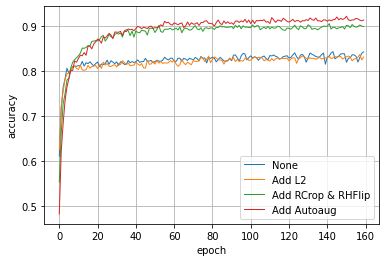

In [30]:
plt.plot(range(Epoch), test_acc_history_1, '-', linewidth=1, label='None')
plt.plot(range(Epoch), test_acc_history_2, '-', linewidth=1, label='Add L2')
plt.plot(range(Epoch), test_acc_history_3, '-', linewidth=1, label='Add RCrop & RHFlip')
plt.plot(range(Epoch), test_acc_history_4, '-', linewidth=1, label='Add Autoaug')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend()

In [16]:
print('None Test acc: %s' % (max(test_acc_history_1)))
print('L2 Test acc: %s' % (max(test_acc_history_2)))
print('L2, RCrop & RHFlip Test acc: %s' % (max(test_acc_history_3)))
print('L2, RCrop, RHFlip & Autoaug Test acc: %s' % (max(test_acc_history_4)))

Best Adam Test acc: 0.8432
Best NAdam Test acc: 0.8366
Best SGD Test acc: 0.9053
Best SGD Test acc: 0.9218
